In [3]:
import pandas as pd

In [4]:
final_cars=pd.read_csv("C:/Users/SAM/Desktop/used car price prediction/finalcar.csv")
final_cars

,bodytype,Car_seats,modelYear,kilometer,fueltype,ownerNo,transmission,price,Insurance,engine_cc,oem,gear_box,Mileage,drivetype,city
0,Hatchback,5.0,2015,120000,Petrol,3,Manual,400000,Third Party insurance,998.0,Maruti,5,23.10,FWD,bangalore
1,SUV,5.0,2018,32706,Petrol,2,Manual,811000,Comprehensive,1497.0,Ford,5,17.00,FWD,bangalore
2,Hatchback,5.0,2018,11949,Petrol,1,Manual,585000,Comprehensive,1199.0,Tata,5,23.84,FWD,bangalore
3,Sedan,5.0,2014,17794,Petrol,1,Manual,462000,Comprehensive,1197.0,Hyundai,5,19.10,FWD,bangalore
4,SUV,5.0,2015,60000,Diesel,1,Manual,790000,Third Party insurance,1248.0,Maruti,5,23.65,FWD,bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,5.0,2022,10000,Petrol,1,Manual,509999,Third Party insurance,998.0,Maruti,5,25.24,FWD,kolkata
8365,Hatchback,5.0,2014,120000,Petrol,1,Manual,180000,Third Party insurance,796.0,Maruti,5,22.74,FWD,kolkata
8366,Sedan,5.0,2011,50000,Petrol,3,Automatic,550000,Third Party insurance,1796.0,Mercedes-Benz,7,11.74,RWD,kolkata
8367,Hatchback,5.0,2012,40000,Petrol,1,Manual,140000,Third Party insurance,1197.0,Maruti,5,18.50,FWD,kolkata


In [3]:
final_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bodytype      8369 non-null   object 
 1   Car_seats     8369 non-null   float64
 2   modelYear     8369 non-null   int64  
 3   kilometer     8369 non-null   int64  
 4   fueltype      8369 non-null   object 
 5   ownerNo       8369 non-null   int64  
 6   transmission  8369 non-null   object 
 7   price         8369 non-null   int64  
 8   Insurance     8369 non-null   object 
 9   engine_cc     8369 non-null   float64
 10  oem           8369 non-null   object 
 11  gear_box      8369 non-null   int64  
 12  Mileage       8369 non-null   float64
 13  drivetype     8369 non-null   object 
 14  city          8369 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 980.9+ KB


#### Frequency of each category

In [6]:
final_cars['ownerNo'].value_counts()

ownerNo
1    5882
2    1982
3     374
4      80
0      32
5      19
Name: count, dtype: int64

In [7]:
final_cars['transmission'].value_counts()


transmission
Manual       6052
Automatic    2317
Name: count, dtype: int64

In [8]:
final_cars['bodytype'].value_counts()

bodytype
Hatchback        3571
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [9]:
final_cars['fueltype'].value_counts()

fueltype
Petrol      5554
Diesel      2673
Cng           98
Electric      28
Lpg           16
Name: count, dtype: int64

In [11]:
final_cars['drivetype'].value_counts()

drivetype
FWD    7147
RWD     648
AWD     292
4WD     282
Name: count, dtype: int64

In [12]:
final_cars['modelYear'].value_counts()

modelYear
2018    980
2017    945
2016    815
2019    789
2021    686
2020    612
2015    605
2014    588
2022    563
2013    400
2012    339
2011    272
2010    254
2009    144
2023    104
2008     85
2007     56
2006     44
2004     25
2005     20
2003     13
2002     10
2001      9
1998      3
1995      2
1985      2
1999      2
2000      1
1997      1
Name: count, dtype: int64

In [19]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='price', ylabel='Count'>

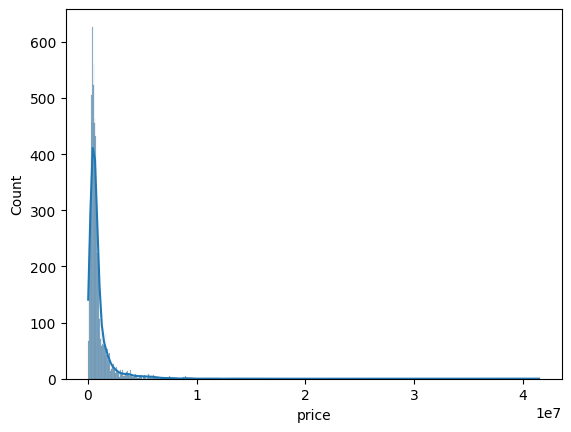

In [4]:
import seaborn as sns
sns.histplot(final_cars['price'], kde=True)


<Axes: ylabel='price'>

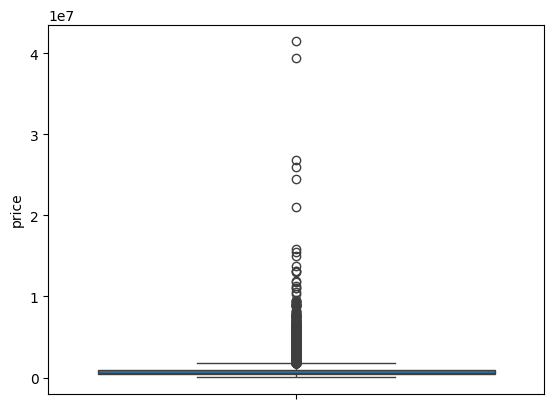

In [5]:
sns.boxplot(final_cars['price'])


<Axes: xlabel='city', ylabel='count'>

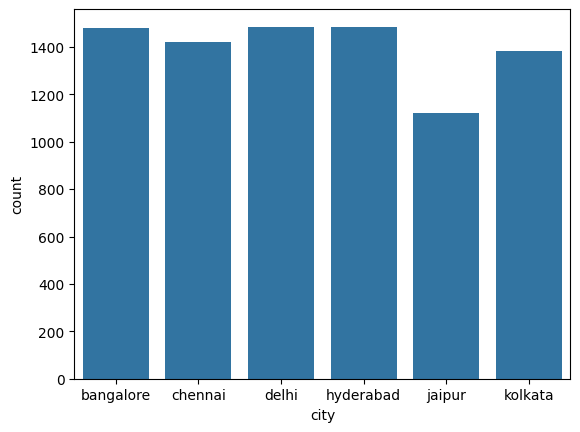

In [6]:
sns.countplot(x='city', data=final_cars)


In [5]:
#Finding the Boundary Values
print("Highest allowed",final_cars['price'].mean() + 3*final_cars['price'].std())
print("Lowest allowed",final_cars['price'].mean() - 3*final_cars['price'].std())

Highest allowed 5205511.566314776
Lowest allowed -3291704.332714585


### seprating numerical and categorical columns


In [6]:
categorical_cols=final_cars.select_dtypes(['object']).columns
categorical_cols

Index(['bodytype', 'fueltype', 'transmission', 'Insurance', 'oem', 'drivetype',
       'city'],
      dtype='object')

In [7]:
numerical_cols = final_cars.select_dtypes(['number']).columns
numerical_cols1=numerical_cols.drop('price')

In [20]:

numerical_cols1

Index(['Car_seats', 'modelYear', 'kilometer', 'ownerNo', 'engine_cc',
       'gear_box', 'Mileage'],
      dtype='object')

In [8]:
total_cols = len(categorical_cols) + len(numerical_cols1)
total_cols

14

### Outlier removal

In [9]:
# Ensure all relevant columns are numerical
numerical_cols_o = final_cars.select_dtypes(include=['number']).columns

# Calculate Q1 and Q3 for numerical columns
Q1 = final_cars[numerical_cols_o].quantile(0.05)
Q3 = final_cars[numerical_cols_o].quantile(0.95)

# Calculate IQR for numerical columns
IQR = Q3 - Q1

# Remove outliers from numerical columns
car_df = final_cars[~((final_cars[numerical_cols_o] < (Q1 - 1.5 * IQR)) |(final_cars[numerical_cols_o] > (Q3 + 1.5 * IQR))).any(axis=1)]

car_df.shape

(8300, 15)

In [10]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB 991.0 kB/s eta 0:00:45
   ---------------------------------------- 0.1/44.5 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.1/44.5 MB 1.2 MB/s eta 0:00:37
   ---------------------------------------- 0.3/44.5 MB 1.4 MB/s eta 0:00:31
   ---------------------------------------- 0.3/44.5 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.3/44.5 MB 1.2 MB/s 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
car_df

,bodytype,Car_seats,modelYear,kilometer,fueltype,ownerNo,transmission,price,Insurance,engine_cc,oem,gear_box,Mileage,drivetype,city
0,Hatchback,5.0,2015,120000,Petrol,3,Manual,400000,Third Party insurance,998.0,Maruti,5,23.10,FWD,bangalore
1,SUV,5.0,2018,32706,Petrol,2,Manual,811000,Comprehensive,1497.0,Ford,5,17.00,FWD,bangalore
2,Hatchback,5.0,2018,11949,Petrol,1,Manual,585000,Comprehensive,1199.0,Tata,5,23.84,FWD,bangalore
3,Sedan,5.0,2014,17794,Petrol,1,Manual,462000,Comprehensive,1197.0,Hyundai,5,19.10,FWD,bangalore
4,SUV,5.0,2015,60000,Diesel,1,Manual,790000,Third Party insurance,1248.0,Maruti,5,23.65,FWD,bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,5.0,2022,10000,Petrol,1,Manual,509999,Third Party insurance,998.0,Maruti,5,25.24,FWD,kolkata
8365,Hatchback,5.0,2014,120000,Petrol,1,Manual,180000,Third Party insurance,796.0,Maruti,5,22.74,FWD,kolkata
8366,Sedan,5.0,2011,50000,Petrol,3,Automatic,550000,Third Party insurance,1796.0,Mercedes-Benz,7,11.74,RWD,kolkata
8367,Hatchback,5.0,2012,40000,Petrol,1,Manual,140000,Third Party insurance,1197.0,Maruti,5,18.50,FWD,kolkata


### encoding process
### lable encoding-- ordinal data
### one hot encoding --- norminal data

In [11]:
categorical_columns_label = ['bodytype','transmission']  # Columns to label encode
categorical_columns_one_hot = ['fueltype','Insurance', 'oem', 'DriveType', 'city']  # Columns to one-hot encode
numerical_columns = ['seats', 'kms', 'modelYear', 'ownerNo', 'engine_cc', 'Gearbox', 'Mileage']  # Numerical columns to scale


### lable encoding (bodytype, transmission)

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming car_df is already defined and contains the columns 'bodytype' and 'transmission'

# List of categorical columns to encode
categorical_columns_label = ['bodytype', 'transmission']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in categorical_columns_label
for column in categorical_columns_label:
    # Encode the column and add it to the DataFrame with a new column name
    car_df[f'{column}_encoded'] = label_encoder.fit_transform(car_df[column])
    
    # Print the mapping for each unique value in the column
    mapping = dict(zip(car_df[column], car_df[f'{column}_encoded']))
    print(f"\nEncoding for {column}:")
    for idx, (value, encoded_num) in enumerate(mapping.items()):
        print(f"{idx}: {value} - {encoded_num}")

# Drop the original 'bodytype' and 'transmission' columns
car_df = car_df.drop(columns=categorical_columns_label)

# Display the DataFrame with the encoded columns
print("\nDataFrame with Encoded Columns (Original Columns Dropped):")
car_df



Encoding for bodytype:
0: Hatchback - 2
1: SUV - 6
2: Sedan - 7
3: MUV - 3
4: Coupe - 1
5: Minivans - 4
6: Pickup Trucks - 5
7: Convertibles - 0
8: Wagon - 8

Encoding for transmission:
0: Manual - 1
1: Automatic - 0

DataFrame with Encoded Columns (Original Columns Dropped):


C:\Users\SAM\AppData\Local\Temp\ipykernel_3944\4092906433.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df[f'{column}_encoded'] = label_encoder.fit_transform(car_df[column])
C:\Users\SAM\AppData\Local\Temp\ipykernel_3944\4092906433.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df[f'{column}_encoded'] = label_encoder.fit_transform(car_df[column])


,Car_seats,modelYear,kilometer,fueltype,ownerNo,price,Insurance,engine_cc,oem,gear_box,Mileage,drivetype,city,bodytype_encoded,transmission_encoded
0,5.0,2015,120000,Petrol,3,400000,Third Party insurance,998.0,Maruti,5,23.10,FWD,bangalore,2,1
1,5.0,2018,32706,Petrol,2,811000,Comprehensive,1497.0,Ford,5,17.00,FWD,bangalore,6,1
2,5.0,2018,11949,Petrol,1,585000,Comprehensive,1199.0,Tata,5,23.84,FWD,bangalore,2,1
3,5.0,2014,17794,Petrol,1,462000,Comprehensive,1197.0,Hyundai,5,19.10,FWD,bangalore,7,1
4,5.0,2015,60000,Diesel,1,790000,Third Party insurance,1248.0,Maruti,5,23.65,FWD,bangalore,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,5.0,2022,10000,Petrol,1,509999,Third Party insurance,998.0,Maruti,5,25.24,FWD,kolkata,2,1
8365,5.0,2014,120000,Petrol,1,180000,Third Party insurance,796.0,Maruti,5,22.74,FWD,kolkata,2,1
8366,5.0,2011,50000,Petrol,3,550000,Third Party insurance,1796.0,Mercedes-Benz,7,11.74,RWD,kolkata,7,0
8367,5.0,2012,40000,Petrol,1,140000,Third Party insurance,1197.0,Maruti,5,18.50,FWD,kolkata,2,1


### one hot emcoding ('fueltype', 'Insurance', 'oem', 'drivetype', 'city')

In [13]:
import pandas as pd

# Assuming car_df is already defined and contains the columns 'fueltype', 'Insurance', 'oem', 'drivetype', and 'city'

# List of categorical columns to one-hot encode
categorical_columns_one_hot = ['fueltype', 'Insurance', 'oem', 'drivetype', 'city']

# Apply one-hot encoding to the specified columns, then convert Boolean to int
car_df = pd.get_dummies(car_df, columns=categorical_columns_one_hot, drop_first=False).astype(int)

# Display the DataFrame with one-hot encoded columns in 1/0 format
print("\nDataFrame with One-Hot Encoded Columns:")
print(car_df)



DataFrame with One-Hot Encoded Columns:
      Car_seats  modelYear  kilometer  ownerNo   price  engine_cc  gear_box  \
0             5       2015     120000        3  400000        998         5   
1             5       2018      32706        2  811000       1497         5   
2             5       2018      11949        1  585000       1199         5   
3             5       2014      17794        1  462000       1197         5   
4             5       2015      60000        1  790000       1248         5   
...         ...        ...        ...      ...     ...        ...       ...   
8364          5       2022      10000        1  509999        998         5   
8365          5       2014     120000        1  180000        796         5   
8366          5       2011      50000        3  550000       1796         7   
8367          5       2012      40000        1  140000       1197         5   
8368          5       2017     120000        2  500000       1461         6   

      Mile

In [14]:
car_df

,Car_seats,modelYear,kilometer,ownerNo,price,engine_cc,gear_box,Mileage,bodytype_encoded,transmission_encoded,...,drivetype_4WD,drivetype_AWD,drivetype_FWD,drivetype_RWD,city_bangalore,city_chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
0,5,2015,120000,3,400000,998,5,23,2,1,...,0,0,1,0,1,0,0,0,0,0
1,5,2018,32706,2,811000,1497,5,17,6,1,...,0,0,1,0,1,0,0,0,0,0
2,5,2018,11949,1,585000,1199,5,23,2,1,...,0,0,1,0,1,0,0,0,0,0
3,5,2014,17794,1,462000,1197,5,19,7,1,...,0,0,1,0,1,0,0,0,0,0
4,5,2015,60000,1,790000,1248,5,23,6,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,5,2022,10000,1,509999,998,5,25,2,1,...,0,0,1,0,0,0,0,0,0,1
8365,5,2014,120000,1,180000,796,5,22,2,1,...,0,0,1,0,0,0,0,0,0,1
8366,5,2011,50000,3,550000,1796,7,11,7,0,...,0,0,0,1,0,0,0,0,0,1
8367,5,2012,40000,1,140000,1197,5,18,2,1,...,0,0,1,0,0,0,0,0,0,1


In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8300 entries, 0 to 8368
Data columns (total 62 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Car_seats                        8300 non-null   int64
 1   modelYear                        8300 non-null   int64
 2   kilometer                        8300 non-null   int64
 3   ownerNo                          8300 non-null   int64
 4   price                            8300 non-null   int64
 5   engine_cc                        8300 non-null   int64
 6   gear_box                         8300 non-null   int64
 7   Mileage                          8300 non-null   int64
 8   bodytype_encoded                 8300 non-null   int64
 9   transmission_encoded             8300 non-null   int64
 10  fueltype_Cng                     8300 non-null   int64
 11  fueltype_Diesel                  8300 non-null   int64
 12  fueltype_Electric                8300 non-null   int6

In [16]:
# Save the DataFrame to a new CSV file
car_df.to_csv('final_cardata.csv', index=False)

print("Data has been saved to 'final_cardata.csv'")


Data has been saved to 'final_cardata.csv'
